In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
grouped2 = pd.read_csv('New_dataset_Merchant_corresponding_incomes.csv')


In [2]:
grouped2['Datetime'] = pd.to_datetime(grouped2['Datetime'])
current_date = grouped2['Datetime'].max()

rfm = grouped2.groupby(['Third Party Name', 'Account No']).agg({
    'Datetime': lambda x: (current_date - x.max()).days,  # Recency
    'Account No': 'count',                                        # Frequency
    'Amount': lambda x: -x.sum()                                    # Monetary
}).rename(columns={
    'Datetime': 'recency',
    'Account No': 'frequency',
    'Amount': 'monetary'
}).reset_index()


In [10]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

best_k_list = []
best_ks = {}

rfm = rfm.groupby('Third Party Name').filter(lambda x: len(x) > 2)

#Perform independent clustering analysis on each merchant
for account in rfm['Third Party Name'].unique():
    print(f"Processing account: {account}")

#Filter data for specific merchants
    account_rfm = rfm[rfm['Third Party Name'] == account]

#Data preprocessing - Standardized RFM values
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(account_rfm[['recency', 'frequency', 'monetary']])
    
    score = []

    num_samples = len(rfm_scaled)
    if num_samples > 10:
        n = 11
    else:
        n = num_samples

#Use silhouette score to find the best k
    for k in range(2, n):
        kmedoids = KMedoids(n_clusters=k, random_state=42, init='random')
        kmedoids.fit(rfm_scaled)
        labels = kmedoids.labels_
        if len(set(labels)) >= 2:
            score.append(silhouette_score(rfm_scaled, labels))
        else:
            score.append(-1)
            break
            
    if (len(score) == 1) and (num_samples != 3):
        best_k = 1
    else:
        best_k = np.argmax(score) + 2
    # Print out the best k value
    print(f"Merchant {account} optimal k value is: {best_k}")
    
    best_k_list.append(best_k)

Processing account: a yarn story
Merchant a yarn story optimal k value is: 2
Processing account: amazon
Merchant amazon optimal k value is: 3
Processing account: blackwell's
Merchant blackwell's optimal k value is: 3
Processing account: blizzard
Merchant blizzard optimal k value is: 5
Processing account: boots
Merchant boots optimal k value is: 3
Processing account: brilliant brushes
Merchant brilliant brushes optimal k value is: 3
Processing account: cass art


D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4

Merchant cass art optimal k value is: 2
Processing account: cex
Merchant cex optimal k value is: 2
Processing account: coffee #1
Merchant coffee #1 optimal k value is: 4
Processing account: collector cave
Merchant collector cave optimal k value is: 2
Processing account: coop local
Merchant coop local optimal k value is: 2
Processing account: costa coffee
Merchant costa coffee optimal k value is: 2
Processing account: craftastic
Merchant craftastic optimal k value is: 3
Processing account: deliveroo
Merchant deliveroo optimal k value is: 2
Processing account: disney
Merchant disney optimal k value is: 1
Processing account: etsy
Merchant etsy optimal k value is: 3
Processing account: fat face


D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Merchant fat face optimal k value is: 3
Processing account: fitted stitch
Merchant fitted stitch optimal k value is: 2
Processing account: five senses art
Merchant five senses art optimal k value is: 3
Processing account: foyles
Merchant foyles optimal k value is: 2
Processing account: gamestation
Merchant gamestation optimal k value is: 2
Processing account: grand union bjj


D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5

Merchant grand union bjj optimal k value is: 10
Processing account: halifax
Merchant halifax optimal k value is: 5
Processing account: hobby lobby
Merchant hobby lobby optimal k value is: 3
Processing account: hobbycraft
Merchant hobbycraft optimal k value is: 2
Processing account: jd sports
Merchant jd sports optimal k value is: 3
Processing account: justeat
Merchant justeat optimal k value is: 2
Processing account: kew house
Merchant kew house optimal k value is: 2
Processing account: kings arms
Merchant kings arms optimal k value is: 2
Processing account: lavender primary
Merchant lavender primary optimal k value is: 2
Processing account: lbg
Merchant lbg optimal k value is: 2
Processing account: lloyds pharmacy
Merchant lloyds pharmacy optimal k value is: 3
Processing account: loosely fitted
Merchant loosely fitted optimal k value is: 2
Processing account: mamas & papas
Merchant mamas & papas optimal k value is: 2
Processing account: matalan
Merchant matalan optimal k value is: 3
P

D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4

Merchant revella optimal k value is: 3
Processing account: rose & crown
Merchant rose & crown optimal k value is: 3
Processing account: sainsbury
Merchant sainsbury optimal k value is: 2
Processing account: sainsbury local
Merchant sainsbury local optimal k value is: 2
Processing account: selfridges
Merchant selfridges optimal k value is: 2
Processing account: sports direct
Merchant sports direct optimal k value is: 3
Processing account: squareonix
Merchant squareonix optimal k value is: 2
Processing account: starbucks
Merchant starbucks optimal k value is: 4
Processing account: stitch by stitch
Merchant stitch by stitch optimal k value is: 2
Processing account: tesco
Merchant tesco optimal k value is: 4
Processing account: the crown
Merchant the crown optimal k value is: 3
Processing account: the works
Merchant the works optimal k value is: 3
Processing account: topshop
Merchant topshop optimal k value is: 3
Processing account: wool
Merchant wool optimal k value is: 3
Processing accou

In [11]:
# count the quantity of best_k
from collections import Counter
counter = Counter(best_k_list)
counter

Counter({2: 26, 3: 19, 5: 2, 4: 3, 1: 3, 10: 1})

In [12]:
np.mean(best_k_list)

2.6666666666666665

In [15]:
# get all rfm customer groups
rfm_labels_df = pd.DataFrame()

for third_party_name in rfm['Third Party Name'].unique():
    
    account_rfm = rfm[rfm['Third Party Name'] == third_party_name]
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(account_rfm[['recency', 'frequency', 'monetary']])
    
    kmedoids = KMedoids(n_clusters=3, random_state=42, init='random')
    kmedoids.fit(rfm_scaled)
    centers = np.array(kmedoids.cluster_centers_)
    clusters = kmedoids.labels_
    
    unique_clusters = np.unique(clusters)
    if len(unique_clusters) == 3:
        # find the cluter which has highest monetry and take it as High-Value customers
        a = np.argmax(centers[:, 2])
        unique_clusters = np.delete(unique_clusters, a)
        
        # recongize the remaining labels to define the Developing customers and Low-Value customers 
        if centers[unique_clusters[1], 0] <= centers[unique_clusters[0], 0]:
            if centers[unique_clusters[0], 0] == centers[unique_clusters[1], 0]:
                index = int(centers[unique_clusters[1], 2] > centers[unique_clusters[0], 2])
                b = unique_clusters[index]
            else:
                index = 1
                b = unique_clusters[index]
        else: 
            index = 0
            b = unique_clusters[index]
                            
        unique_clusters = np.delete(unique_clusters, index)
        c = unique_clusters[0]
        cluster_labels = {a: 'High-Value Customers', b: 'Developing Customers', c: 'Low-Value/Risky Customers'}
    
    # Some data only contain two labels
    elif len(unique_clusters) == 2:
        a = np.argmax(centers[:, 2])
        unique_clusters = np.delete(unique_clusters, a)
        b = unique_clusters[0]
        cluster_labels = {a: 'High-Value Customers', c: 'Developing Customers'}
        
     # Some data only contain a label
    elif len(unique_clusters) == 1:
        a = unique_clusters[0]
        cluster_labels = {a: 'Developing Customers'}
    
    account_rfm_copy = account_rfm.copy()
    account_rfm_copy['cluster'] = clusters
    account_rfm_copy['cluster_label'] = account_rfm_copy['cluster'].map(cluster_labels) 
    rfm_labels_df = pd.concat([rfm_labels_df, account_rfm_copy], axis=0, ignore_index=True)       

D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2

In [16]:
rfm_labels_df.head()

,Third Party Name,Account No,recency,frequency,monetary,cluster,cluster_label
0,a yarn story,128033695.0,16,15,292.60,2,Developing Customers
1,a yarn story,138969884.0,158,1,47.84,2,Developing Customers
2,a yarn story,221868392.0,319,1,2.99,0,Low-Value/Risky Customers
3,a yarn story,228136274.0,281,1,33.00,0,Low-Value/Risky Customers
4,a yarn story,235881534.0,319,1,134.85,0,Low-Value/Risky Customers


In [17]:
rfm_labels_df.to_csv('new_data_rfm_with_KMedoids_customer_groups.csv', index=False)

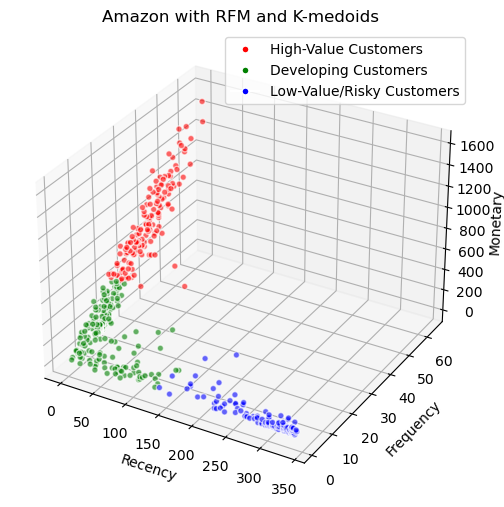

In [7]:
from sklearn_extra.cluster import KMedoids
from matplotlib.lines import Line2D
account_rfm = rfm[rfm['Third Party Name'] == rfm['Third Party Name'].unique()[1]]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(account_rfm[['recency', 'frequency', 'monetary']])
rfm_original = scaler.inverse_transform(rfm_scaled)
    
kmedoids = KMedoids(n_clusters=3, random_state=42, init='random')
kmedoids.fit(rfm_scaled)
clusters = kmedoids.labels_
 
set_colors = ['red', 'green', 'blue']
set_labels = ['High-Value Customers', 'Developing Customers', 'Low-Value/Risky Customers']    
    
colors = [set_colors[label] for label in clusters]
    
#Create a new graph and a 3D subgraph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


#Assign data points to three-dimensional space
xs = rfm_original[:, 0]  # Recency
ys = rfm_original[:, 1]  # Frequency
zs = rfm_original[:, 2]  # Monetary


#Create a 3D scatter plot with colors defined by clustering labels
scatter = ax.scatter(xs, ys, zs, c=colors, marker='o', alpha=0.6, edgecolors='w')


 #Set chart titles and axis labels
ax.set_title('Amazon with RFM and K-medoids')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary', labelpad=1)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                         markerfacecolor=color, markersize=5) for color, label in zip(set_colors, set_labels)]
ax.legend(handles=legend_elements, loc='best')

plt.show()

In [9]:
print(f'The Silhouette score of k-medoids is {silhouette_score(rfm_scaled, clusters)}')

The Silhouette score of k-medoids is 0.6827667281438758
